### Project: Create a neural network class

---

Based on previous code examples, develop a neural network class that is able to classify any dataset provided. The class should create objects based on the desired network architecture:

1. Number of inputs
2. Number of hidden layers
3. Number of neurons per layer
4. Number of outputs
5. Learning rate

The class must have the train, and predict functions.

Test the neural network class on the datasets provided below: Use the input data to train the network, and then pass new inputs to predict on. Print the expected label and the predicted label for the input you used. Print the accuracy of the training after predicting on different inputs.

Use matplotlib to plot the error that the train method generates.

**Don't forget to install Keras and tensorflow in your environment!**

---

### Import the needed Packages

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Needed for the mnist data
from keras.datasets import mnist
from keras.utils import to_categorical 

### Define the class

In [100]:
class NeuralNetwork:

    def __init__(self, architecture, alpha):
        '''
            layers: List of integers which represents the architecture of the network.
            alpha:  Learning rate.
            
            Number of inputs
            Number of hidden layers
            Number of neurons per layer
            Number of outputs
            Learning rate
        '''
        # TODO: Initialize the list of weights matrices, then store
        # the network architecture and learning rate
        self.nInputs = architecture[0]
        self.nHidLay = architecture[1]
        self.neuPerLay = architecture[2]
        self.nOutputs = architecture[3]
        self.weights = []
        self.b = []
        self.alpha = alpha #learning rate          
        
        #if nHidLay == 1: #just one hidden layer
        #    self.weights.append(np.random.randn(nInputs, neuPerLay))
        #    self.b.append(neuPerLay)
        #    self.weights.append(np.random.randn(neuPerLay,nOutputs))
        #    self.b.append(nOutputs)
        #else: #quiza se pueda quitar el anterior por la condicion del while
        self.weights.append(np.random.randn(self.nInputs, self.neuPerLay)) 
        self.b.append(np.random.randn(self.neuPerLay))
        x = 0
        while x < self.nHidLay-1: #create n -1 weight matrices 
            self.weights.append(np.random.randn(self.neuPerLay, self.neuPerLay))
            self.b.append(np.random.randn(self.neuPerLay))
            x += 1
        #the last weight matrix
        self.b.append(np.random.randn(self.nOutputs))
        self.weights.append(np.random.randn(self.neuPerLay, self.nOutputs))

            
    def __repr__(self): 
        # construct and return a string that represents the network 
        # architecture 
        return "NeuralNetwork: {}".format( "-".join(str(l) for l in self.layers))

    def softmax(self, X):  
        # applies the softmax function to a set of values
        
        expX = np.exp(X)
        return expX / expX.sum(axis=1, keepdims=True)
        
    def sigmoid(self, x):
        # the sigmoid for a given input value
        
        return 1.0 / (1.0 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        # the derivative of the sigmoid
        
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def predict(self, inputs):
        # TODO: Define the predict function
        """if self.nHidLay == 1: #just one hidden layer
            level0 = inputs #input
            level1 = self.sigmoid(np.dot(level0,self.weights[0]) +self.b[0] ) #h1 h2 (the hidden layer) y = xw +b
            level2 = self.softmax(np.dot(level1,self.weights[1]) +self.b[1] ) #the prediction
            return level2
        else:
            levelX = inputs #input
            x = 0
            while x < self.nHidLay+1: 
                if x == self.nHidLay: #use softmax in the last calculation
                    levelX = self.softmax(np.dot(levelX,self.weights[x]) + self.b[x]) #error
                    #levelX = self.sigmoid(np.dot(levelX,self.weights[x]) + self.b[x])
                else:
                    levelX = self.sigmoid(np.dot(levelX,self.weights[x]) + self.b[x])
                x += 1
            #prediction = sigmoid(np.dot(level,self.weights[x]) + self.b[x])
            return levelX"""
        # forward propagation
        levels = []
        levels.append(inputs)

        x = 0
        while x < (self.nHidLay + 1):
            if x == self.nHidLay and self.nOutputs > 1: #use softmax in the last calculation
                levels.append(self.softmax(np.dot(levels[x], self.weights[x])+ self.b[x])) #keeps error at 0.5
                #levels.append(self.sigmoid(np.dot(levels[x], self.weights[x])+ self.b[x])) 
            else:
                levels.append(self.sigmoid(np.dot(levels[x], self.weights[x])+ self.b[x]))
            x+=1
        return levels[-1]
                    
                
        
    def train(self, inputs, labels, epochs = 1000, displayUpdate = 100):
        # TODO: Define the training step for the network. It should include the forward and back propagation
        # steps, the updating of the weights, and it should print the error every 'displayUpdate' epochs
        # It must return the errors so that they can be displayed with matplotlib
        
        #for error display
        error = []
        fig, ax = plt.subplots(1,1)
        ax.set_xlabel('epoch')
        ax.set_ylabel('error')
        
        for epoch in range(epochs):
            # forward propagation
            levels = []
            levels.append(inputs)
            
            x = 0
            while x < (self.nHidLay + 1):
                if x == self.nHidLay and self.nOutputs > 1: #use softmax in the last calculation
                    levels.append(self.softmax(np.dot(levels[x], self.weights[x])+ self.b[x])) #keeps error at 0.5
                    #levels.append(self.sigmoid(np.dot(levels[x], self.weights[x])+ self.b[x])) 
                else:
                    levels.append(self.sigmoid(np.dot(levels[x], self.weights[x])+ self.b[x]))
                x+=1
            
            #lists for error values
            calculated_error = []
            level_deltas = []
            b_deltas = []
            
            #error at last level
            calculated_error.append(labels - levels[-1])
            error.append(np.mean(np.abs(calculated_error[-1])))
            level_deltas.append(calculated_error[-1] * self.sigmoid_deriv(levels[-1]))
            #print("par {} {} {}".format(levels[-1], self.sigmoid_deriv(levels[-1]),calculated_error[-1]))
            
            #backpropagation
            lev = len(levels) -1 #we already calculated the last level
            while lev > 0:
                #print(lev)
                calculated_error.append(np.dot(level_deltas[-1], self.weights[lev-1].T))
                b_deltas.append(np.sum(level_deltas[-1]))
                level_deltas.append(calculated_error[-1] * self.sigmoid_deriv(levels[lev-1]))
                #print("par: {} {}".format(calculated_error[-1], self.sigmoid_deriv(levels[lev-1])))
                lev -= 1

            #update weights
            level_deltas.reverse()
            b_deltas.reverse()
            i = 0 # len(self.weights) -1
            while i  < len(self.weights): #>= 0:
                #self.weights[i] += np.dot(levels[i].T, level_deltas[i-1]) * self.alpha
                #self.b += b_deltas[i] * self.alpha
                #i -= 1
                
                self.weights[i] += np.dot(levels[i].T, level_deltas[i+1]) * self.alpha
                #self.b[i] += np.sum(b_deltas[i], axis=0, keepdims=True) * self.alpha 
                self.b[i] += b_deltas[i] * self.alpha
                i += 1
           
            if epoch%displayUpdate == 0:
                print("Error:", np.mean(np.abs(calculated_error[0])))            
            
        #plot the graphic
        ax.plot(error)

### Test datasets

#### XOR

In [80]:
# input dataset
XOR_inputs = np.array([  
                [0,0],
                [0,1],
                [1,0],
                [1,1]
            ])

# labels dataset            
XOR_labels = np.array([[0,1,1,0]]).T

Error: 0.5104413320075786
Error: 0.49944955613265574
Error: 0.4987197634263243
Error: 0.49752627485372136
Error: 0.49544638354276016
Error: 0.49125532573741293
Error: 0.48322809379261383
Error: 0.46974806562411253
Error: 0.413638693944903
Error: 0.26756743655358495
prediction:
 [[0.14790758]
 [0.80344738]
 [0.81353345]
 [0.17560507]]


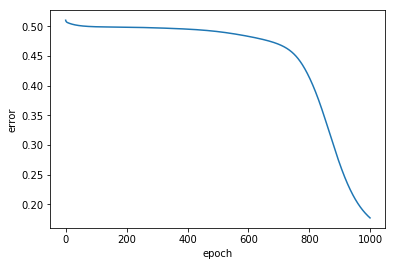

In [143]:
#TODO: Test the class with the XOR 

#doesn't work with softmax

#architecture = (nInputs, nHidLay, neuPerLay, nOutputs)
architecture = [2,2,4,1]
XOR_test = NeuralNetwork(architecture, 1)

#np.random.seed(42)
XOR_test.train(XOR_inputs, XOR_labels)

prediction = XOR_test.predict(XOR_inputs)
print("prediction:\n {}".format(prediction))


#### Multiple classes

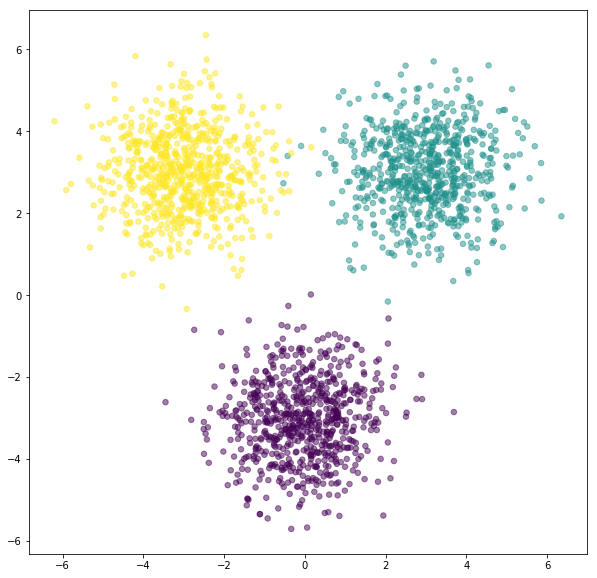

In [26]:
# Creates the data points for each class
class_1 = np.random.randn(700, 2) + np.array([0, -3])  
class_2 = np.random.randn(700, 2) + np.array([3, 3])  
class_3 = np.random.randn(700, 2) + np.array([-3, 3])

feature_set = np.vstack([class_1, class_2, class_3])

labels = np.array([0]*700 + [1]*700 + [2]*700)

one_hot_labels = np.zeros((2100, 3))

for i in range(2100):  
    one_hot_labels[i, labels[i]] = 1

plt.figure(figsize=(10,10))  
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, s=30, alpha=0.5)  
plt.show()

Error: 0.44688887772498537
Error: 0.07594628759323242
Error: 0.06568600005589265
Error: 0.06313769838924845
Error: 0.061953531839304896
Error: 0.061544538440512955
Error: 0.061532488543623136
Error: 0.06161844029860111
Error: 0.06150706177808623
Error: 0.061398120500218034
prediction: 
[[9.00362515e-02 3.51782808e-04 9.09611966e-01]]


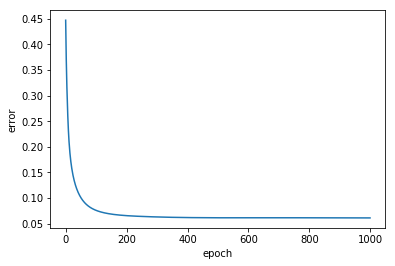

In [79]:
#TODO: Test 
#works with softmax
#architecture = (nInputs, nHidLay, neuPerLay, nOutputs, alpha)
architecture = [2,1,4,3]
color_test = NeuralNetwork(architecture, 0.001)
color_test.train(feature_set, one_hot_labels)

test = np.array([[-3,0]])
prediction = color_test.predict(test)
print("prediction: \n{}".format(prediction))

#### On the mnist data set

---
Train the network to classify hand drawn digits.

For this data set, if the training step is taking too long, you can try to adjust the architecture of the network to have fewer layers, or you could try to train it with fewer input. The data has already been loaded and preprocesed so that it can be used with the network.

---

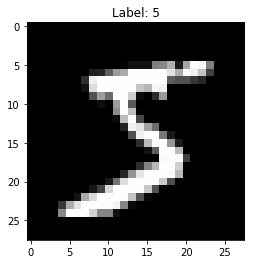

In [14]:
# Load the train and test data from the mnist data set
#doetn´t work with softmax correctly
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

test_copy = np.copy(test_images)
# Plot a sample data point
plt.title("Label: " + str(train_labels[0]))
plt.imshow(train_images[0], cmap="gray")

In [15]:
# Standardize the data

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28))
# turn values from 0-255 to 0-1
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

# Create one hot encoding for the labels
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

Error: 0.18009709031670892
Error: 0.07065456878961925
Error: 0.07209658392556802
Error: 0.081900008317203
Error: 0.0634720222657356
Error: 0.058444015413133356
Error: 0.06858884664096493
Error: 0.06444252384572904
Error: 0.06344690157813129
Error: 0.06803251141467825


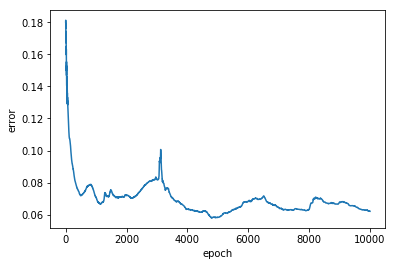

In [23]:
# TODO: Test the class with the mnist data. Test the training of the network with the test_images data, and 
# record the accuracy of the classification.

np.random.seed(42)

#architecture = (nInputs, nHidLay, neuPerLay, nOutputs)
architecture = [784,3,32,10]
number_test = NeuralNetwork(architecture, 0.001)

number_test.train(train_images[:5000], train_labels[:5000], epochs = 10000, displayUpdate= 1000)

After predicting on the *test_images*, use matplotlib to display some of the images that were not correctly classified. Then, answer the following questions: 

1. **Why do you think those were incorrectly classified?**
     There is no enought training of the neurons and it may be over trained
2. **What could you try doing to improve the classification accuracy?**
    Increase the number of epochs and neurons

10000
2435


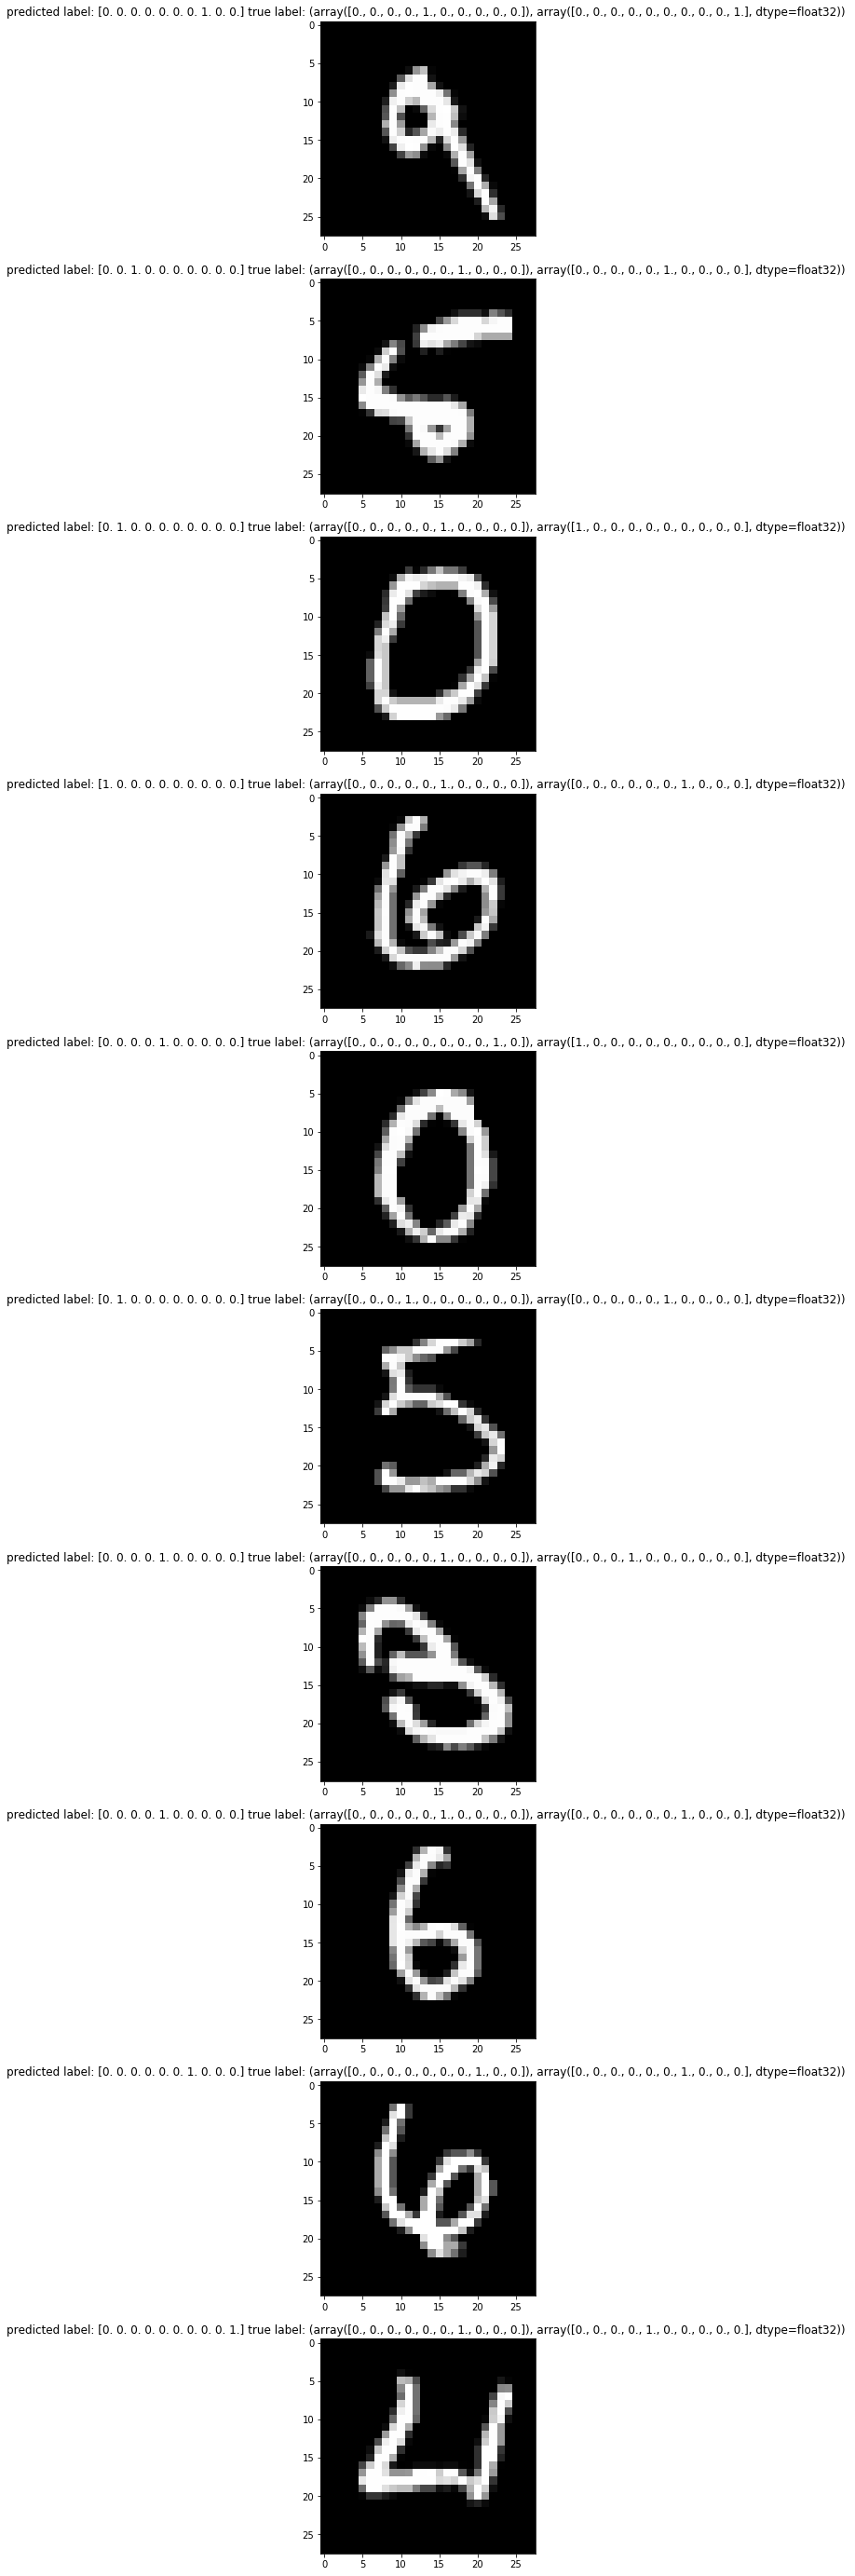

In [25]:
#predict the images
number_prediction = number_test.predict(test_images)

#one hot enconding

for e in number_prediction:
    for x in range(10):
        if e[x] == e.max():
            e[x] = 1
    e[ e < 1] = 0

incorrect = []
index = []
i = 0
for predicted, expected in zip(number_prediction, test_labels):
    for x in range(10):
        if predicted[x] != expected[x]: #different prediction
            incorrect.append((predicted,expected))
            index.append(i)
            break
        
    i += 1
        
"""for x in index:
    print("{} != {}".format(number_prediction[x], test_labels[x]))"""
print(len(number_prediction)) 
print(len(incorrect))

figure, plots = plt.subplots(10, 1, figsize=(50,50))
samples = []
for i in range(10):
    samples.append(test_copy[index[i]])

i = 0
for m, sp in zip(samples, plots):
    sp.set_title("predicted label: {} true label: {} ".format(number_prediction[i], incorrect[i]))
    i += 1
    sp.imshow(m, cmap="gray")